In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict (3).csv


In [16]:
df = pd.read_csv(next(iter(uploaded)))

In [17]:

df = df.drop(columns=['Serial No.'])
df['Admitted'] = (df['Chance of Admit '] >= 0.5).astype(int)
df = df.drop(columns=['Chance of Admit '])

In [18]:
X = df[['GRE Score', 'CGPA']]
y = df['Admitted']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9125

Confusion Matrix:
 [[ 5  5]
 [ 2 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.93      0.97      0.95        70

    accuracy                           0.91        80
   macro avg       0.82      0.74      0.77        80
weighted avg       0.90      0.91      0.91        80



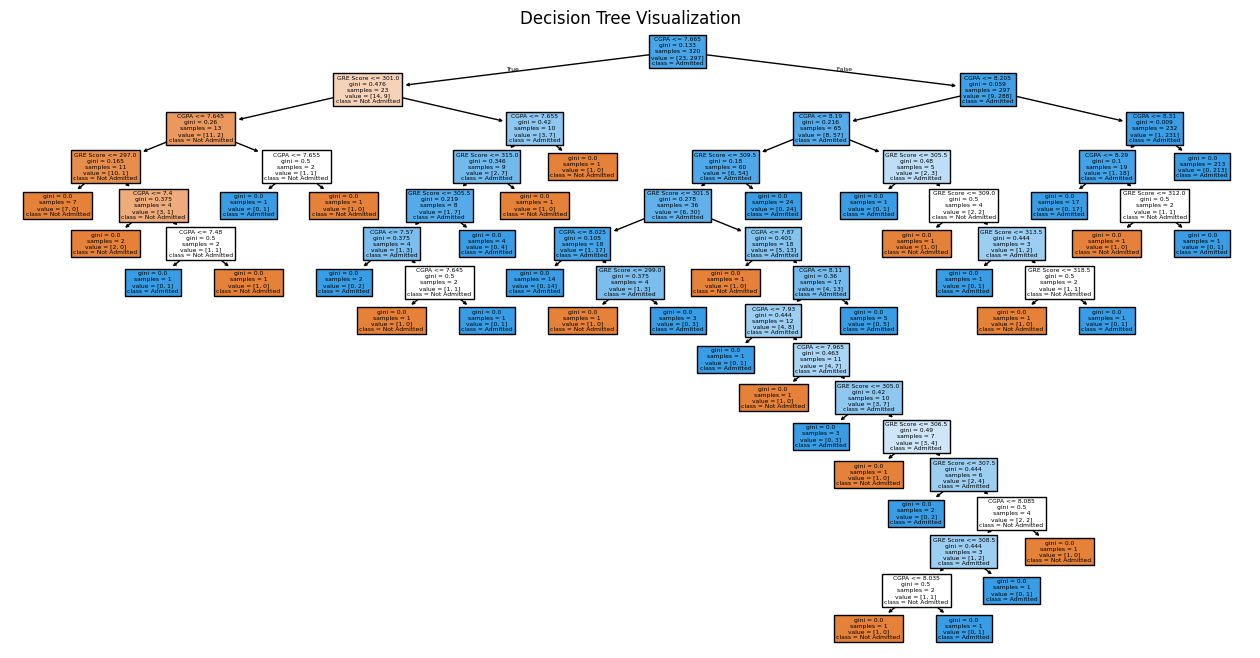

In [23]:
plt.figure(figsize=(16, 8))
tree.plot_tree(clf, feature_names=['GRE Score', 'CGPA'], class_names=['Not Admitted', 'Admitted'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()